# **გეგმა**

---


ჰიპერპარამეტრების შერჩევა <br/>
შერეული სიზუსტე (mixed precision) <br/>
მულტი-GPU გაწვრთნა <br/>


# ჰიპერპარამეტრების შერჩევა

მოდელის გაწვრთნისას ნებისმიერ ეტაპზე ( pre-training, fine-tuning, reinforcement learning) საჭიროა სწორი პარამეტრების შერჩევა, რადგან მცირე ცვლილებამაც კი შეიძლება ბევრად შეგვიცვალოს წარმადობა.
ვკონცენტრირდეთ fine-tuning-ზე და შემდეგ პარამეტრებზე:

1. **მოდელის ზომა** <br/>
2. batch size <br/>
3. dropout rate <br/>
4. learning rate <br/>
5. ეპოქების რაოდენობა <br/>

მოდელის ზომის არჩევა ხშირად დამოკიდებულია რამდენიმე ფაქტორზე: სასურველი შედეგი, ხელმისაწვდომი გამოთვლითი რესურსები და თუ რამდენად საექსპერიმენტოა პროცესი. უმჯობესია რომ შედარებით პატარა ზომის მოდელზე ვცადოთ ხოლმე საუკეთესო ჰიპერპარამეტრების სეტის/სეტების მოძებნა და შემდეგ უკვე ბევრად მცირე ექსპერიმენტი გავუშვათ დიდ მოდელზე.

შეზღუდული გამოთვლითი რესურსების შემთხვევაში და არა მარტო, შეგვიძლია მივაკითხოთ Huggingface-ს სივრცეს https://huggingface.co/spaces/Vokturz/can-it-run-llm სადაც მოდელის inference-ს, სრული fine-tuning-ის და ასევე LORA-თი fine-tuning-ის დროს საჭირო GPU მეხსიერების გამოთვლა ხდება და შესაბამისად ვადგენთ თუ რამდენად საკმარისია სხვადასხვა GPU-ები კონკრეტული მოდელებისთვის. LORA-ს შემთხვევაში ამ ყველაფრის დასადგენად იყენებენ შემდეგ ფორმულას: <br/>
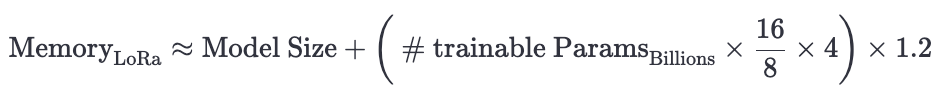

ამ სივრცეში მარცხენა მხარეს ვირჩევთ მოდელს რომლის გაშვებასაც ვფიქრობთ, GPUს რომელიც ხელმისაწვდომია ჩვენთვის და მარჯვენა მხარეს ვიხილავთ სტატისტიკებს სხვადასხვა მონაცემების ტიპით მოდელის გაშვებისას რამდენად გვეყოფა GPU და თუ არ გვეყოფა, რა რაოდენობის მსგავსი GPU დაგვჭირდება.

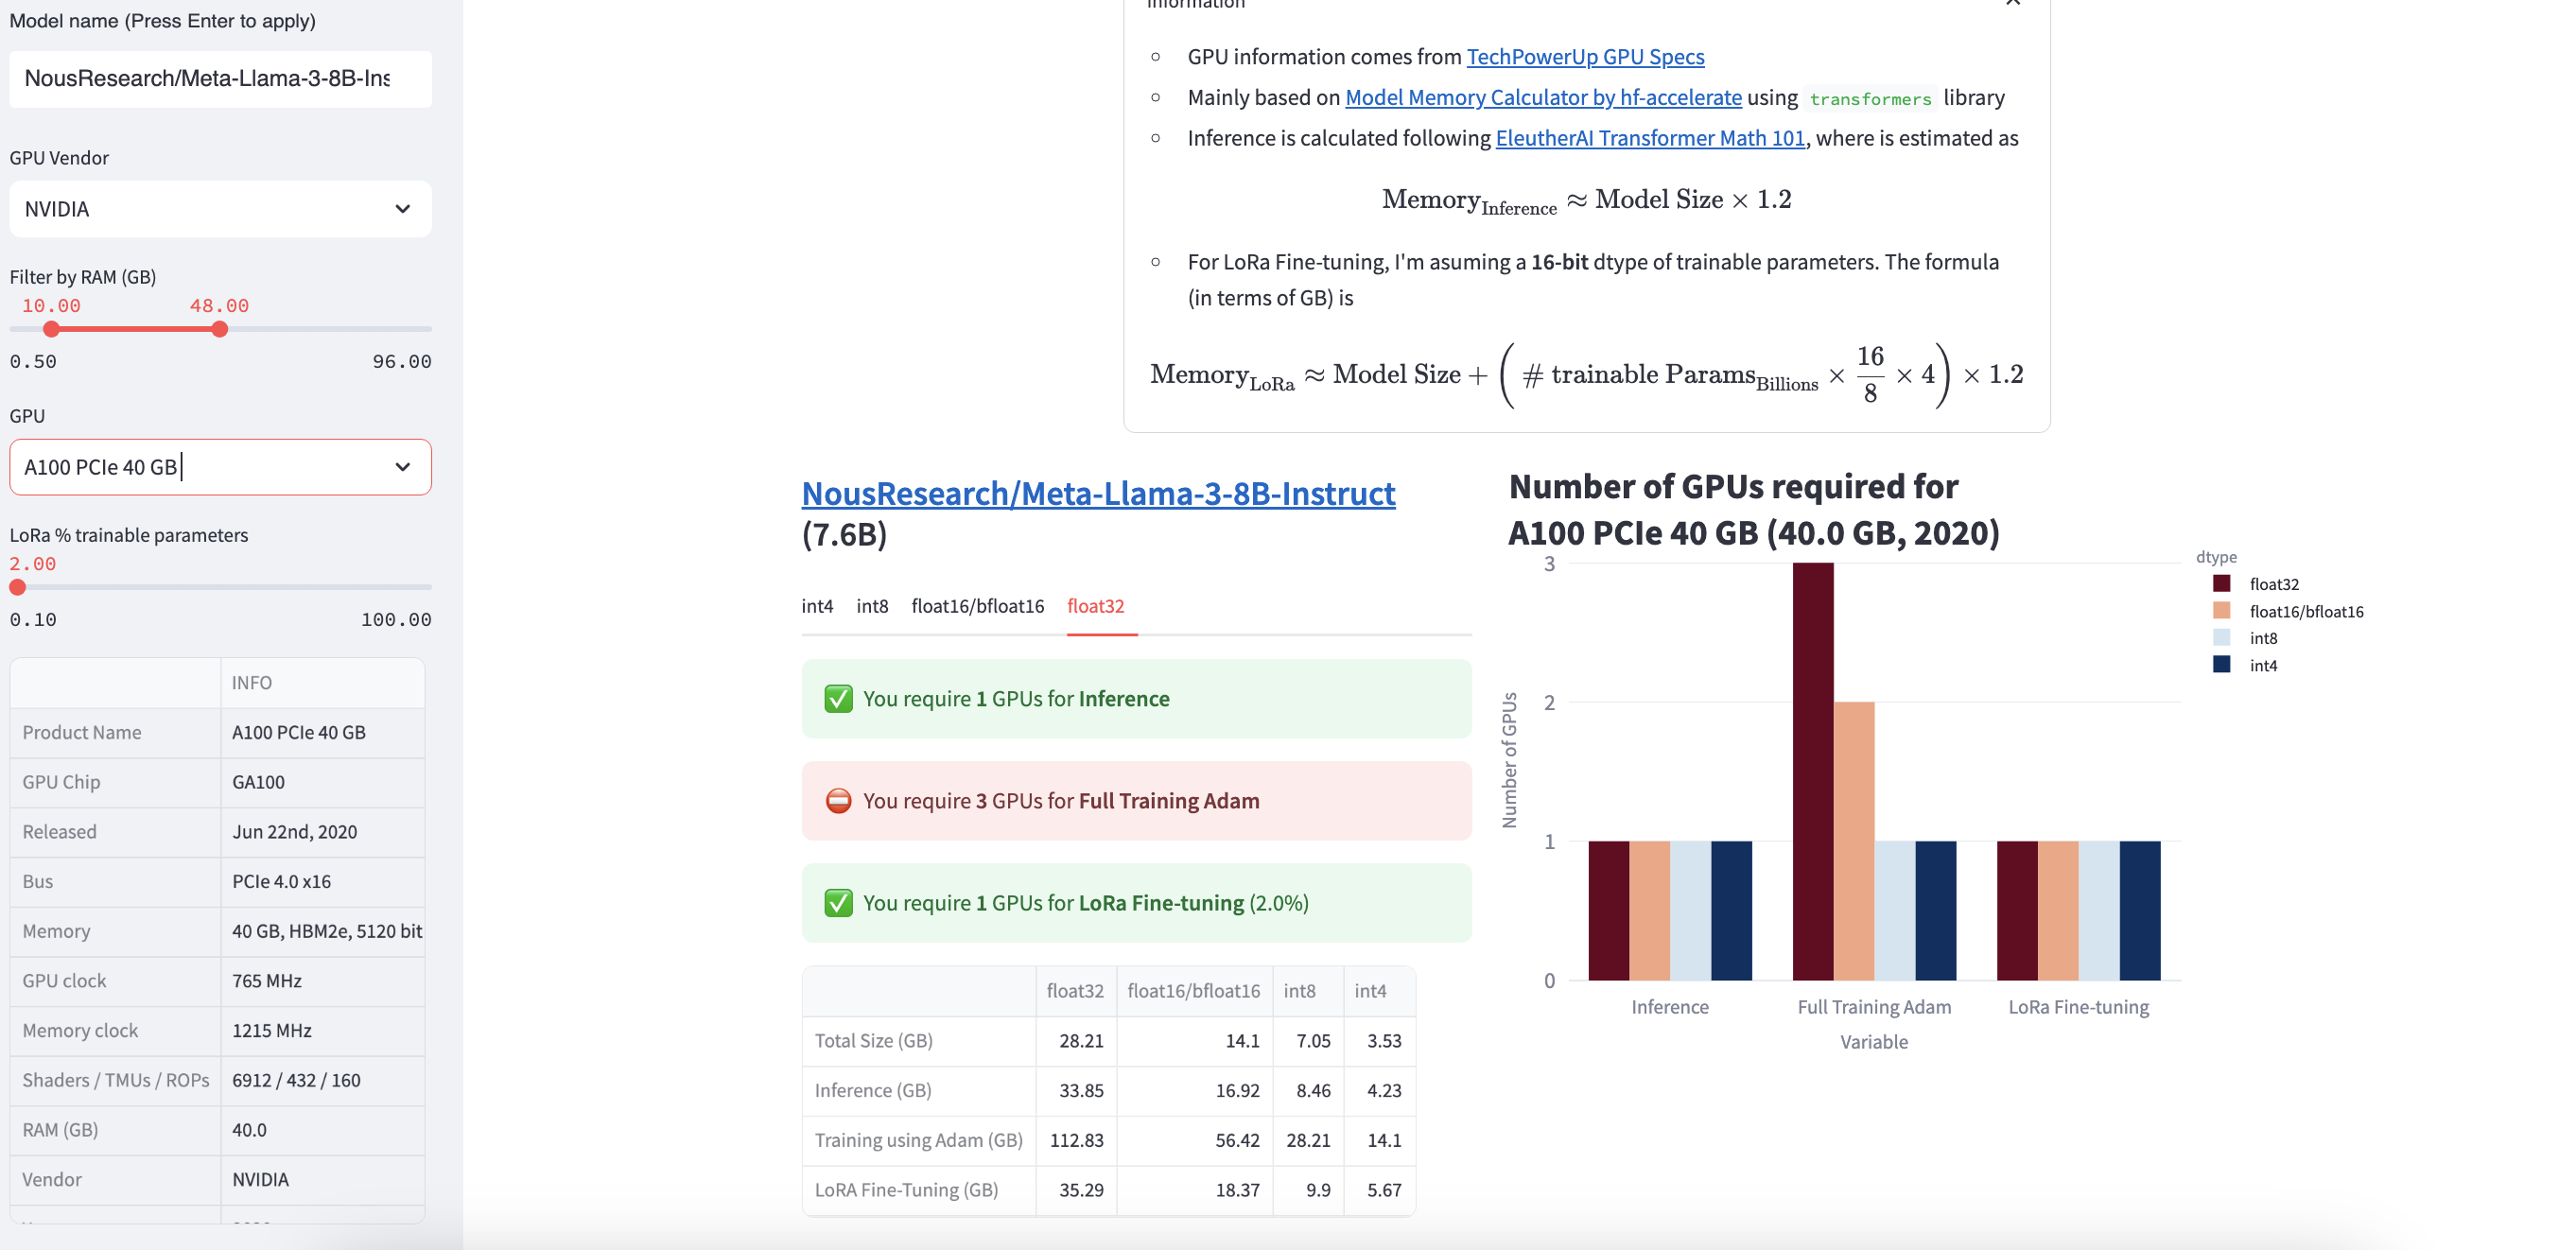

1. მოდელის ზომა <br/>
2. **batch size**<br/>
3. dropout rate <br/>
4. learning rate <br/>
5. ეპოქების რაოდენობა <br/>

ოპტიმალური batch size დამოკიდებულია მოდელის არქიტექტურაზე, მონაცემების რაოდენობასა და ხელმისაწვდომ გამოთვლით რესურსებზე. საშუალოდ batch size მერყეობს 16-დან 128-მდე. დიდი batch უზრუნველყოფს გრადიენტის უფრო ზუსტ გამოთვლას, წონების ნაკლებად ხშირი განახლებით, რამაც შედეგად შეიძლება უფრო ზუსტ შედეგამდე მიგვიყვანოს რადგან ყოველი წონების განახლება მეტ ინფორმაციაზეა დამოკიდებული. თუმცა რადგან ხშირად გამოთვლითი რესურსი არ გვიწყობს ხოლმე ხელს, ზემოაღნიშნული პროცესი შეგვიძლია დავარეგულიროთ gradient_accumulation_step პარამეტრით. მაგალითისთვის:
1. per_device_train_batch_size = **8**  <br/>
   gradient_accumulation_steps = **2**  <br/>

2. per_device_train_batch_size = **16**  <br/>

პირველი და მეორე ბრძანება ტექნიკურად იგივე შედეგამდე მიგვიყვანს რადგან gradient accumulation steps ნიშნავს თუ რამდენი step-ის გავლის შემდეგ უნდა განვაახლოთ წონები, ანუ ამ მაგალითის შემთხვევაში, როდესაც 2 batch-ზე დავასრულებთ გამოთვლას მერე განვაახლებთ წონებს ორივე batch-ის ინფორმაციაზე დაყრდნობით. მაგალითად, თუ ბევრი GPU გვაქვს მაგრამ თითოეულის მეხსიერება შეზღუდულია, დაპარალელებისას ამ გზით უკეთ გამოვიყენებთ რესურსებს.


1. მოდელის ზომა <br/>
2. batch size<br/>
3. **dropout rate** <br/>
4. learning rate <br/>
5. ეპოქების რაოდენობა <br/>

რა არის dropout rate და რატომ გვჭირდება მისი რეგულირება ?



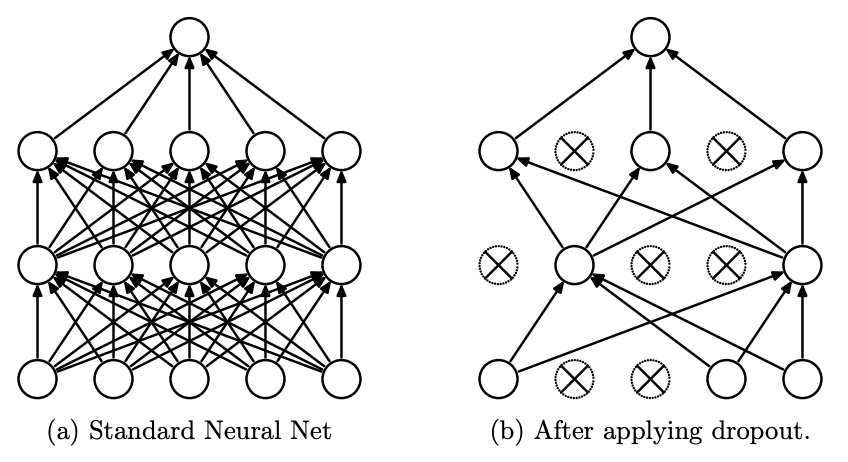

Dropout ღრმა დასწავლის მოდელებში ნიშნავს შემთხვევითობის პრინციპით რომელიღაც ნეირონების ჯგუფის უგულებელყოფას დასწავლის დროს. ეს ტექნიკა გვეხმარება ზედმეტი მორგებისგან (overfitting) თავის დაცვაში რაც საკმაოდ საშიში შეიძლება იყოს დიდი ენის მოდელების შემთხვევაში, fine-tuning-ისას ახალი დავალების დასწავლისას, მოდელმა რომ არ დაივიწყოს pre-training-ის დროს შესწავლილი ინფორმაცია.

1. Dropout ხელს უწყობს იმას, რომ მოდელი არ იყოს ძალიან დამოკიდებული ნეირონების რომელიმე კონკრეტულ კომპლექტზე და, შედეგად, უკეთესად განზოგადდეს ახალ, უხილავ მონაცემებზე.

2. ტექნიკა ხელს უწყობს მოდელის სიმტკიცეს: ზოგიერთი ნეირონების გამოტოვებით, მოდელი სწავლობს პროგნოზების გაკეთებას სხვადასხვა ნეირონების ერთობლიობებზე.

3. ამარტივებს მოდელს გაწვრთნის დროს: ყოველი გაწვრთნის ეტაპი Dropout-ით ჰგავს სრული მოდელის უფრო მარტივი ვერსიის გაწვრთნას. ეს ეხმარება მოდელს მონაცემთა უფრო მარტივი და ფუნდამენტური შაბლონების შესწავლაში.

Dropout პარამეტრის მნიშვნელობა fine-tuningის დროს ჩვეულებრივ მერყეობს ხოლმე 0.1-დან 0.5-მდე, ანუ ნეირონების 10%-დან 50%-მდე იგნორირებულია დასწავლის დროს.



1. მოდელის ზომა <br/>
2. batch size<br/>
3. dropout rate <br/>
4. **learning rate** <br/>
5. ეპოქების რაოდენობა <br/>

Learning rate ანუ დასწავლის სისწრაფე ერთ-ერთი უმთავრესი ჰიპერპარამეტრია, რომლის სახელიც გვკარნახობს რომ ის წყვეტს თუ რამდენად სწრაფად ან ნელა სწავლობს მოდელი, რადგან ის განსაზღვრავს ნაბიჯის ზომას გაწვრთნის ყოველი იტერაციისას, როდესაც ვეძებთ დანაკარგის ფუნქციის მინიმუმს.

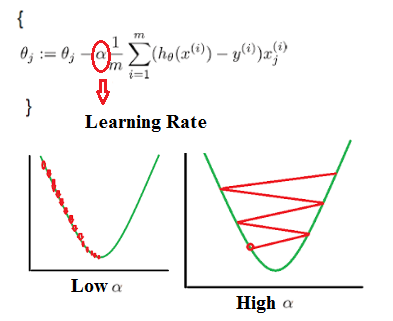

როგორც ფოტოზე ვხედავთ, Learning Rate (LR) გავლენას ახდენს მოდელის წონების შეცვლისას იმაზე, თუ რამდენად დიდ ნაბიჯს გადავდგავთ მინიმუმისკენ მიმავალ ფერდობზე. დიდმა ნაბიჯმა ანუ მაღალმა დასწავლის სისწრაფემ შესაძლოა გამოიწვიოს ოპტიმალურ მინიმუმზე გადახტომა რასაც ვხედავთ ზედა ფოტოში მარჯვენა ნახაზზე, მეორე მხრივ კი დაბალ LR-ს შეიძლება ძალიან დიდი დრო დასჭირდეს დანახარჯის ფუნქციის გლობალურ მინიმუმამდე მიღწევისთვის და/ან საერთოდ გაიჭედოს კიდეც ლოკალურ მინიმუმში. <br/>
რისკები ყველა მხარეს არსებობს და მნიშვნელოვანია ამ პარამეტრის დელიკატურად არჩევა. სხვადასხვა ამოცანებისთვის და მოდელებისთვის დაახლოებით ცნობილია ხოლმე როგორ ჯობია რომ მივუდგეთ. <br/>
მაგალითად სრული fine-tuning-ის დროს  ხშირად 1e-5 დან 5e-5 მდე LR ს იყენებენ ხოლმე, მაგრამ LORA-ს გამოყენებისას, უმეტეს შემთხვევაში 1e-4 არის ოპტიმალური.
თუმცა, რადგან ყველა ამოცანა ინდივიდუალურია, საუკეთესო იქნება რამდენიმეს ცდა და დანაკარგის ცვლილებაზე (loss)  დაკვირვება რომ დავადგინოთ თუ რამდენად კარგად სწავლობს მოდელი.

მნიშვნელოვანია ასევე Learning Rate scheduler-ის გამოყენება, რომელიც ეპოქებთან ერთად შეცვლის და მისი ფორმის მიხედვით ან 0-მდე ჩამოიყვანს Learning Rate-ს ან ცვლის დროსთან ერთად კოსინუსის ფორმაზე (cosine learning rate scheduler)

1. მოდელის ზომა <br/>
2. batch size<br/>
3. dropout rate <br/>
4. learning rate <br/>
5. **ეპოქების რაოდენობა** <br/>

ეპოქების რაოდენობა დასწავლის დროს გვიჩვენებს თუ რამდენჯერ გადაუვლის/დაამუშავებს მოდელი მთლიან მონაცემთა ბაზას. სწორი რაოდენობის არჩევა აუცილებელია რომ "გადასწავლისგან" ( overfitting) დავიცვათ თავი. ეპოქების რაოდენობის არჩევისას გასათვალისწინებელია რამდენიმე ფაქტორი: <br/>
1. დავალებებს, რომლებიც უფრო რთულია ან ძალიან განსხვავდება იმისგან, რაც პირველად დაისწავლა მოდელმა (pre-training-ის დროს) , შეიძლება მეტი ტრენინგი დასჭირდეს. ეს დამატებითი დრო ეხმარება მოდელს სწორად დაარეგულიროს შიდა პარამეტრები. შესაბამისად, თუ მოდელი ამ კონკრეტულ ამოცანაზე კარგად იყო გაწვრთნილი, შესაძლოა მცირე რაოდენობის ეპოქები დასჭირდეს fine-tuning-ის დროს. <br/>
2. შეგვიძლია გამოვიყენოთ მართვის გავრცელებული მეთოდი -  ადრეული გაჩერება (early stopping). ეს ნიშნავს, რომ თუ მოდელის წარმადობა გარკვეული რაოდენობის ეპოქების შემდეგ აღარ უმჯობესდება, შევაჩეროთ იმის მიუხედავად თუ რამდენი ეპოქა აქვს დარჩენილი. <br/>
3. მნიშვნელოვანია პროცესში თვალი ვადევნოთ მეტრიკებს, როგორიცაა training და validation loss. თუ ეს ორი მნიშვნელოვნად განსხვავდება, ეს შეიძლება ნიშნავდეს, რომ მოდელი ზედმეტად მოერგო გასაწვრთნელ მონაცემებს და შემდეგში ეპოქების რაოდენობის შემცირება შეიძლება სჯობდეს.

ენის დიდი მოდელების fine-tuning-ისას, საშუალოდ, ისეთი ამოცანებისთვის რაც მოდელს უკვე დასწავლილი აქვს, 1-5 ეპოქამდე საკმარისია ხოლმე, ხოლო ახალი ამოცანებისთვის 10-20 ეპოქამდე. თუმცა რა თქმა უნდა, ყველა საკითხი ინდივიდუალურად უნდა გადაწყდეს მეტრიკებზე და წარმადობაზე დაკვირვებით.




# შერეული სიზუსტე (mixed precision)

მცურავ-მძიმიანი რიცხვები ანუ floating points 32 ბიტით, პროგრამულად შეგვიძლია ჩავწეროთ შემდეგნაირად :


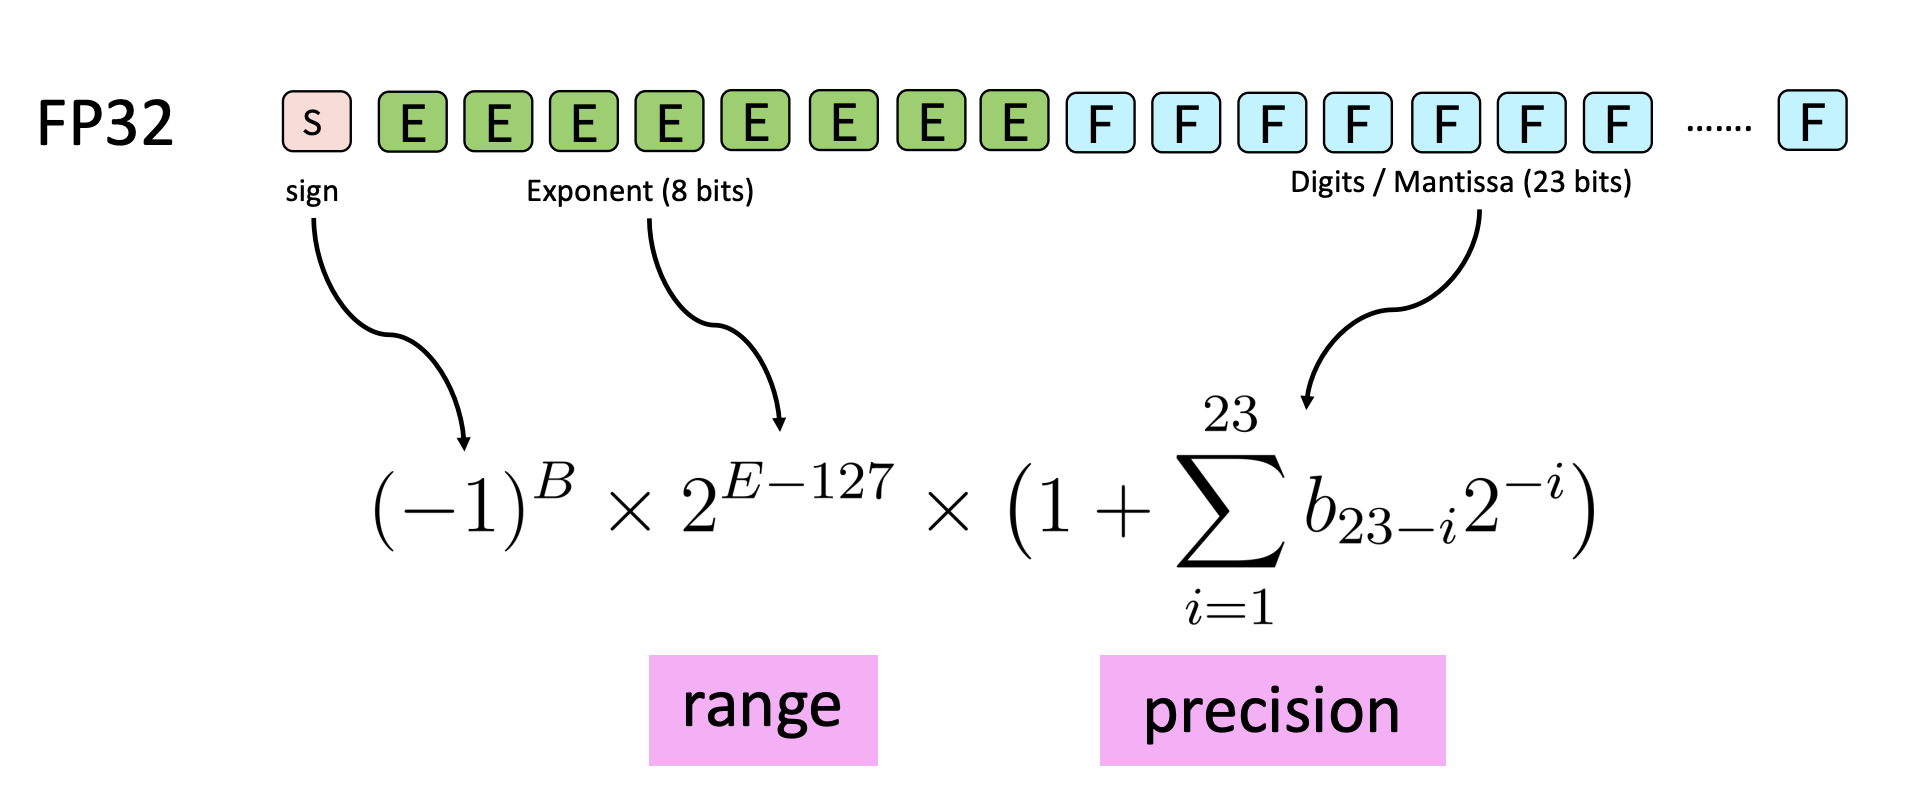

სადაც პირველი ბიტი გვიჩვენებს რიცხვი უარყოფითია თუ დადებითი, შემდეგი 8 ბიტი ექსპონენტას დიაპაზონს განსაზღვრავს , ხოლო შემდეგი 23 ბიტი - მანტისა განსაზღვრავს სიზუსტეს.

მაგალითისთვის: <br/>
<font color='red'>0</font>1000000101000000000000000000000 <br/>
0 აღნიშნავს რომ დადებითი რიცხვია <br/>
0<font color='red'>10000001</font>01000000000000000000000 <br/>
10000001 ათობითი წარმოდგენით არის 129 <br/>
010000001<font color='red'>01000000000000000000000</font> <br/>
01000000000000000000000 ათობითში წარმოადგენს 0.25 ს რადგან 2^-2 = 0.25 <br/>
შედეგად:
(-1)^0 * 2^2 * 1.25 = 5


ძირითადად მოდელების გაწვრთნის დროს ყველა მონაწილე რიცხვის ჩაწერა ხდება ხოლმე 32 ბიტიანი ფორმატით. თუმცა მეხსიერების და რესურსების დაზოგვის მიზნით შესაძლებელია 16 ბიტიანი ჩაწერაც ( რასაც ნახევარ-სიზუსტეს ანუ Half precision უწოდებენ ხოლმე)

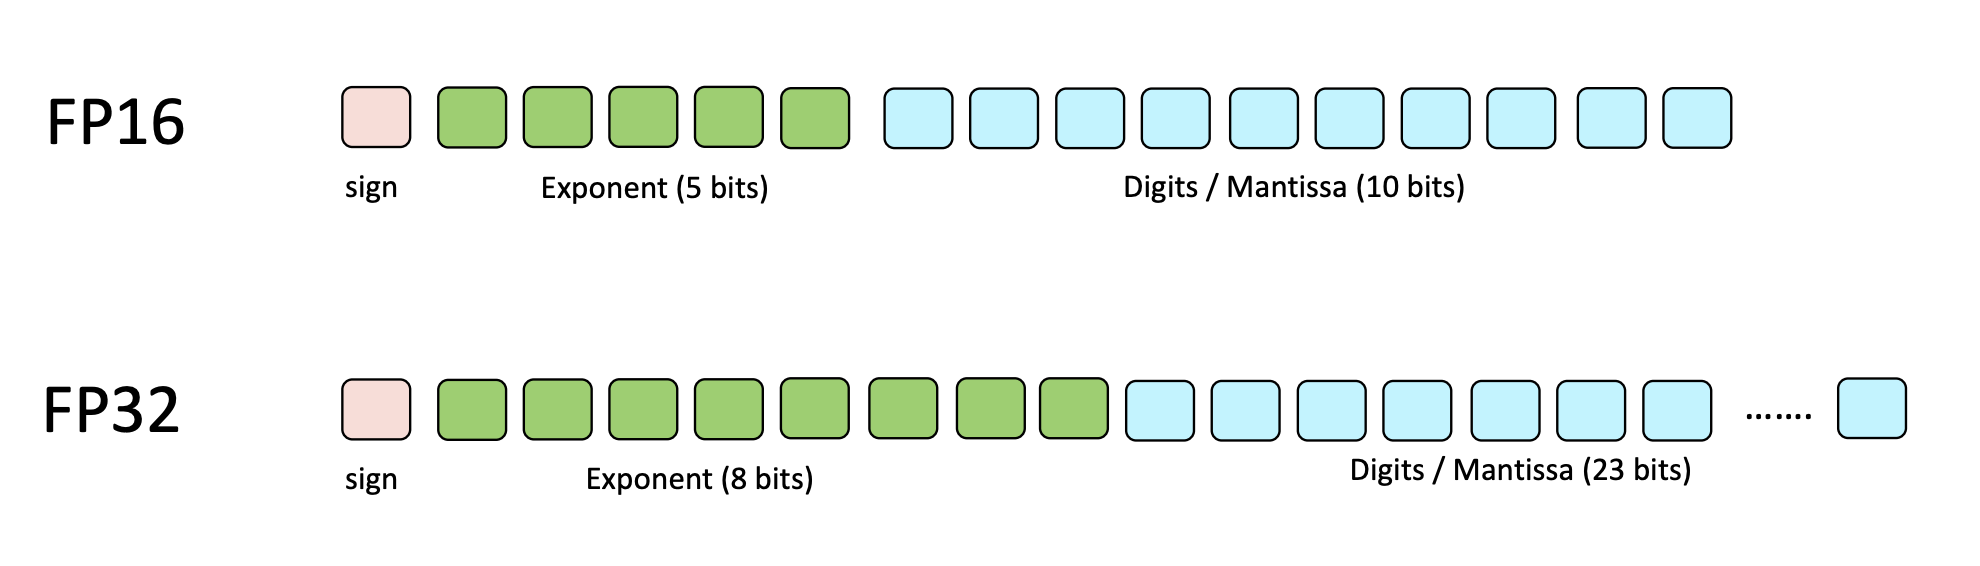

In [ ]:
import torch
torch.finfo(torch.float32)

finfo(resolution=1e-06, min=-3.40282e+38, max=3.40282e+38, eps=1.19209e-07, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=float32)

In [ ]:
torch.finfo(torch.float16)

finfo(resolution=0.001, min=-65504, max=65504, eps=0.000976562, smallest_normal=6.10352e-05, tiny=6.10352e-05, dtype=float16)

ზემოთ შეგვიძლია ვიხილოთ 32 და 16 ბიტში ჩაწერის სხვაობები მაქსიმალურ და მინიმალურ რიცხვებთან დაკავშირებით და ასევე რეზოლუციასთან - შესაბამისად დამრგვალების სიზუსტესთან. <br/>

თუ მოდელის fine-tuning-ისას 16 ბიტიან ფორმატში ჩავწერთ მონაცემებს, გრადიენტები შეიძლება ძალიან დიდი იყოს, იმდენად დიდი რომ გადააჭარბოს 16 ბიტიანი ჩაწერის შესაძლო ზღვარს, რამაც შეიძლება მოდელის გაწვრთნა ძალიან არასტაბილური გახადოს. <br/>

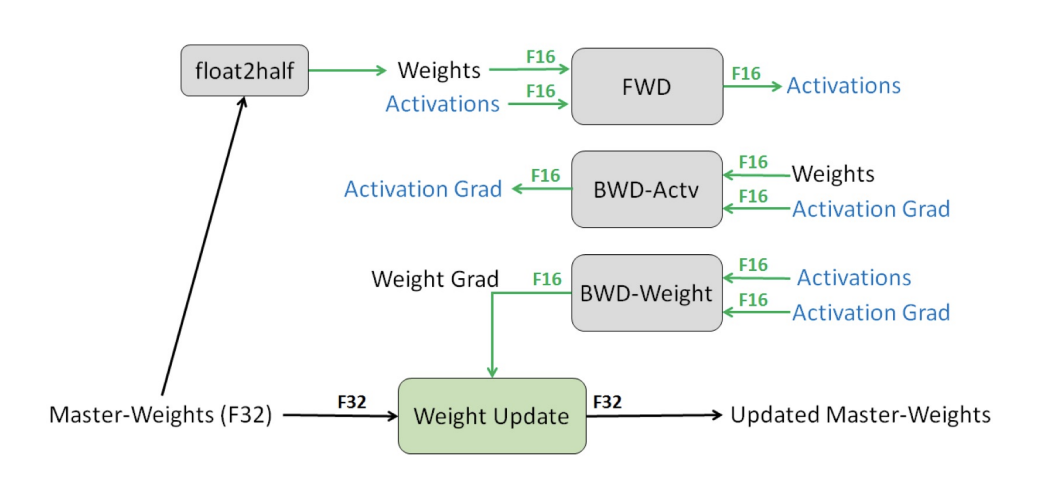


შედეგად გამოსავალი არის "Mixed-precision" გაწვრთნაში. ანუ წონებს და აქტივაციებს FP16-ში ვინახავთ, ხოლო გრადიენტების დათვლა და მთავარი წონებს განახლება ხდება FP32 ფორმატში. <br/>
"Mixed-precision", რომელიც უფრო დეტალურად ზედა ფოტოზე ჩანს, ძალიან ხშირად გამოყენებადია.

# მულტი-GPU გაწვრთნა

როდესაც გვაქვს შესაძლებლობა ჩვენი მოდელი გავწვრთნათ რამდენიმე GPUზე, ჩვენ ეს შანსი აუცილებლად უნდა გამოვიყენოთ იმიტომ რომ საკმაოდ ააჩქარებს პროცესს. <br/>
სხვადასხვა გამოთვლილ რესურსებზე დაპარალელებისას შეგვიძლია განვიხილოთ: <br/>
1. **მონაცემების დაპარალელება** <br/>
2. მოდელის დაპარალელება <br/>
3. სრული გაწვრთნის პროცესის დაპარალელება <br/>

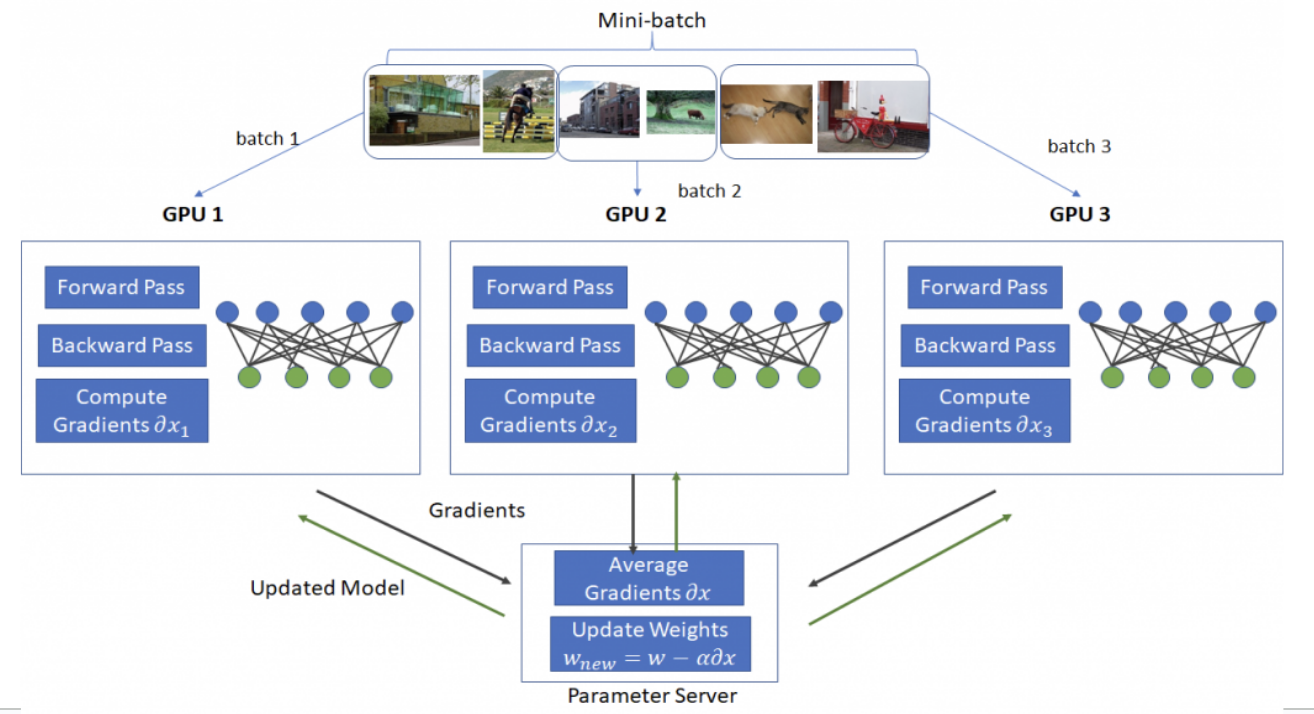

მაგალითისთვის წარმოვიდგინოთ რომ გვაქვს 3 GPU , მონაცემების დაპარელელებისას ჩვენ:  
1. მთლიანი მოდელის წონებს ვადუბლირებთ სამივე GPUზე.
2. სხვადასხვა მონაცემთა batch-ებს ვუშვებთ სხვადასხვა GPU-ში.
3. ვითვლით გრადიენტებს დამოუკიდებლად თითოეული მათგანისთვის.
4. ვასაშუალოებთ და ვაჯერებთ გრადიენტებს და ვანახლებთ წონებს სამივე GPUზე

ეს მიდგომა კარგია, როცა დიდი მონაცემთა ბაზა გვაქვს და ამოცანა რაზეც მოდელს ვწვრთნით შედარებით ერთგვაროვანია და მონაცემებს შორის დიდად არ განსხვავდება

1. მონაცემების დაპარალელება <br/>
2. **მოდელის დაპარალელება** <br/>
3. სრული გაწვრთნის პროცესის დაპარალელება <br/>

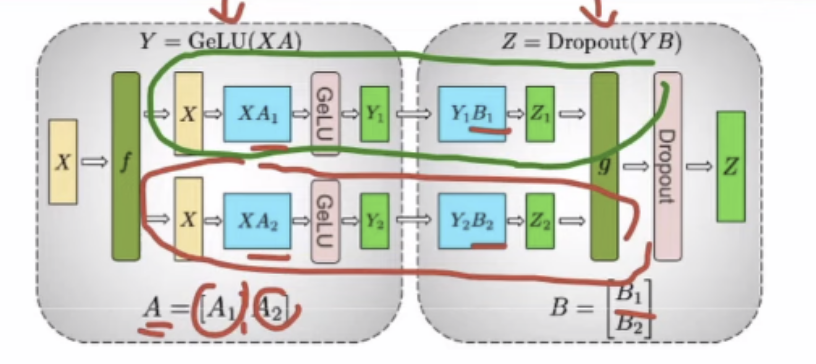

წარმოვიდგინოთ რომ გვაქვს 2 GPU , მოდელის დაპარალელების დროს:
1. წონებს ვყოფთ 2 GPUს შორის ჰორიზონტალურად.
2. 1 batch-ს ვყოფთ ორ ნაწილად.
3. Pipeline-ს ბოლოში ვაჯამებთ თითოეულ GPUზე მიღებულ მნიშვნელობებს.
4. ვუყვებით backpropagation-ით უკან და ვანახლებთ წონებს.

მოდელის დაპარალელება მარტივად შეგვიძლია წარმოვიდგინოთ როგორც მოდელის ჰორიზონტალურად გახლეჩვის პროცესი. ეს მიდგომა მნიშვნელოვანია როდესაც მოდელის ზომა არის ძალიან დიდი და ვერ ეტევა ერთი GPU-ს მეხსიერებაში.

1. მონაცემების დაპარალელება <br/>
2. მოდელის დაპარალელება <br/>
3. **სრული გაწვრთნის პროცესის დაპარალელება** <br/>

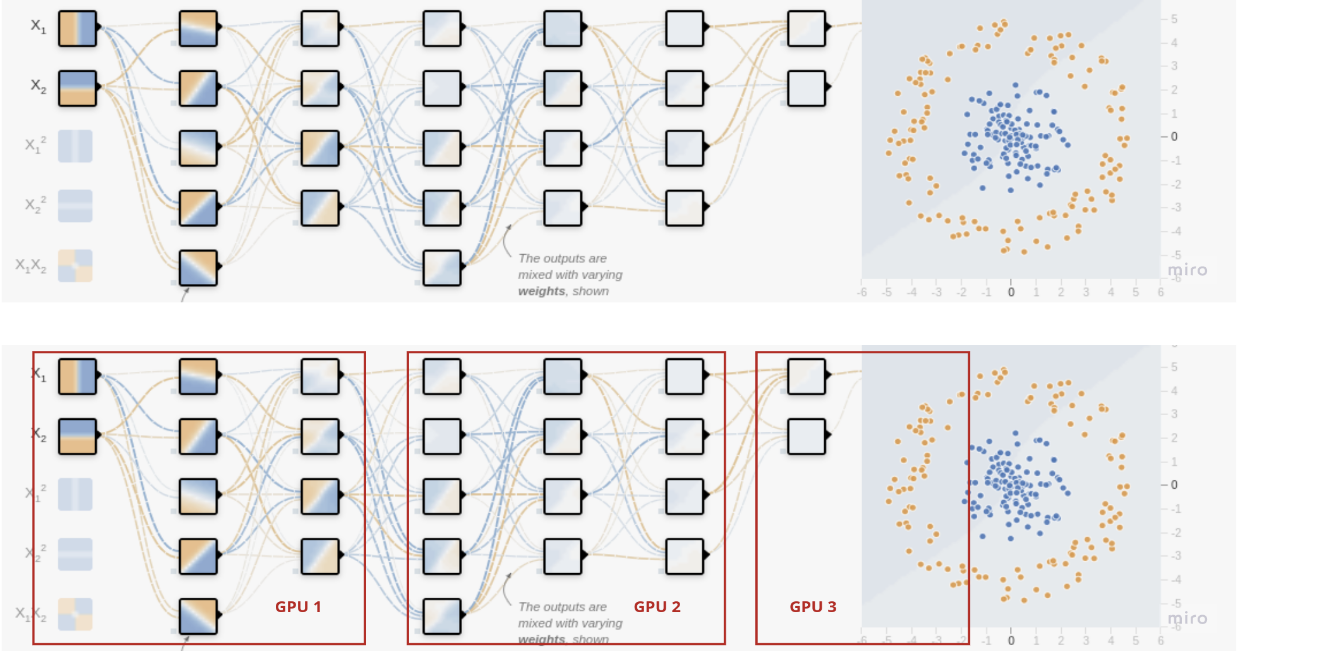

დავუშვათ გვინდა გაწვრთნის პროცესის ე.წ Pipeline დაპარალელება და გვაქვს 3 GPU.

ზემოთ არსებულ ფოტოზე ვხედავთ რომ მოდელის დაპარალელებისგან განსხვავებით, აქ მოდელს ვყოფთ ვერტიკალურად და ამ კონკრეტულ მაგალითზე პროცესი მიმდინარეობს შემდეგნარიად:
1. ვანაწილებთ სხვადასხვა წონებს და შრეებს 3 GPUზე.
2. მონაცემების batch შედის პირველ GPU-ში და გამოითვლება შესაბამისი აქტივაციები.
3. გამოთვლები გადაეგზავნება მეორე GPUს და ასე გრძელდება იტერაციულად.

თუმცა ამ იმპლემენტაციაში როგორც ვხედავთ, იმ სიკეთის მიუხედავად რომ მთლიანი მოდელის წონების 1 GPUზე ჩატვირთვა არ გვიწევს, დროის ყველა მონაკვეთში მხოლოდ 1 GPU-ა დატვირთული რაც დიდად ვერ ააჩქარებს პროცესს და შეიძლება შეანელოს კიდეც რადგან სხვადასხვა გამოთვლით რესურსს შორის უნდა მოხდეს ინფორმაციის გაცვლა. ამიტომ გაუმჯობესებული ვარიანტია :

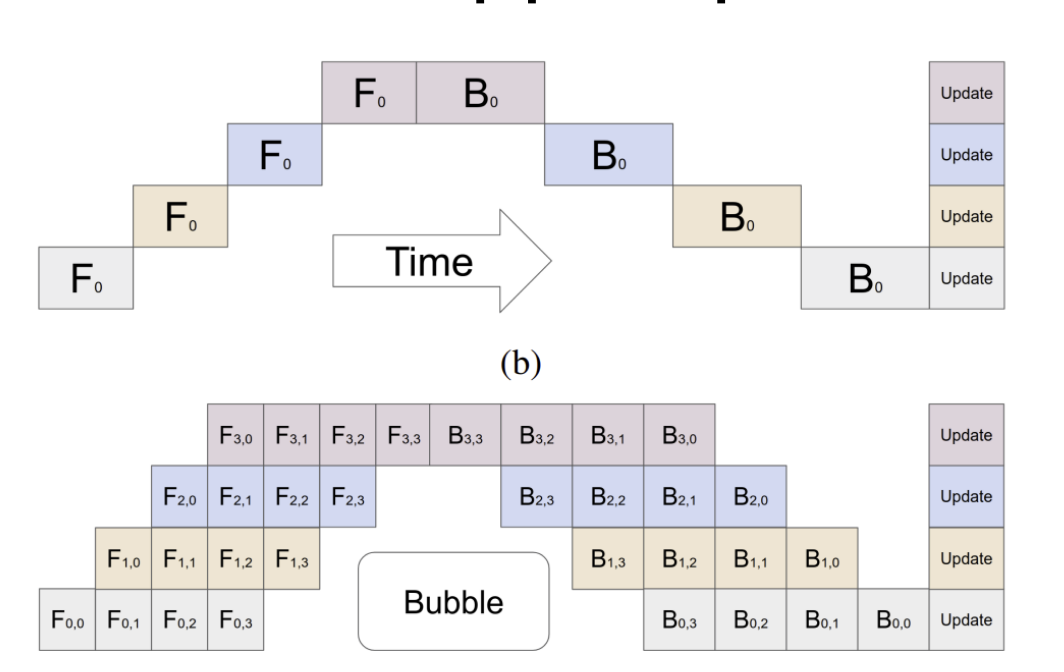

ფოტოზე ვხედავთ რომ როგორც კი პირველი batch გამოვა პირველი GPUდან და გადაინაცვლებს მეორეზე, და შესაბამისად პირველი GPU გათავისუფლდება - ეს უკანასკნელი ახალ მონაცემთა batch-ს მიიღებს და შესაბამისად მაქსიმალურად დავტვირთავთ ყველა GPUს და ამ გზით დროშიც მოვიგებთ.

ამ მიდგომის პლიუსებია რესურსების კარგი გამოყენება, სისწრაფე და რაც ყველაზე მთავარია შეგვიძლია რომ დიდი მოდელი ჩავტვირთოთ რამდენიმე GPUში თუ ის ერთ RAM-ში არ ეტევა.

**რომ შევაჯამოთ, ყველა ამოცანას ინდივიდუალური მიდგომა სჭირდება მაგრამ ზემოთ ჩამოთვლილი რჩევები და მიდგომები დაგვეხმარება გზის გაკვლევაში და ჩვენს სასურველ შედეგამდე მალე მისვლაში** ✅